# Glasses Detection Image Classification

In [1]:
import pickle
import numpy as np
from numpy import asarray
import os
import pandas as pd
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import image
from matplotlib import pyplot
import seaborn as sns
sns.set_style("whitegrid")
import visualkeras
from keras_sequential_ascii import keras2ascii
from PIL import Image , ImageFont

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import ZeroPadding2D, Dropout 

from tensorflow.keras.applications import VGG16 ,Xception ,ResNet50 ,MobileNet ,DenseNet121 ,EfficientNetB1



# Data Reading

In [2]:
list_images_glasses = []
name_glasses= []
for dirname, _, filenames in os.walk('Images\glasses'):
    for filename in filenames:
        list_images_glasses.append(os.path.join(dirname, filename))
        name_glasses.append(filename)
list_images_glasses

['Images\\glasses\\face-10.jpg',
 'Images\\glasses\\face-100.jpg',
 'Images\\glasses\\face-1001.jpg',
 'Images\\glasses\\face-1002.jpg',
 'Images\\glasses\\face-1003.jpg',
 'Images\\glasses\\face-1005.jpg',
 'Images\\glasses\\face-1006.jpg',
 'Images\\glasses\\face-1008.jpg',
 'Images\\glasses\\face-101.jpg',
 'Images\\glasses\\face-1011.jpg',
 'Images\\glasses\\face-1012.jpg',
 'Images\\glasses\\face-1013.jpg',
 'Images\\glasses\\face-1014.jpg',
 'Images\\glasses\\face-1017.jpg',
 'Images\\glasses\\face-1023.jpg',
 'Images\\glasses\\face-1029.jpg',
 'Images\\glasses\\face-103.jpg',
 'Images\\glasses\\face-1030.jpg',
 'Images\\glasses\\face-1031.jpg',
 'Images\\glasses\\face-1033.jpg',
 'Images\\glasses\\face-1034.jpg',
 'Images\\glasses\\face-1039.jpg',
 'Images\\glasses\\face-1040.jpg',
 'Images\\glasses\\face-1042.jpg',
 'Images\\glasses\\face-1044.jpg',
 'Images\\glasses\\face-1045.jpg',
 'Images\\glasses\\face-1046.jpg',
 'Images\\glasses\\face-1047.jpg',
 'Images\\glasses\\face-1

In [3]:
open_file = open("list_images_glasses.txt", "wb")
pickle.dump(list_images_glasses, open_file)
open_file.close()

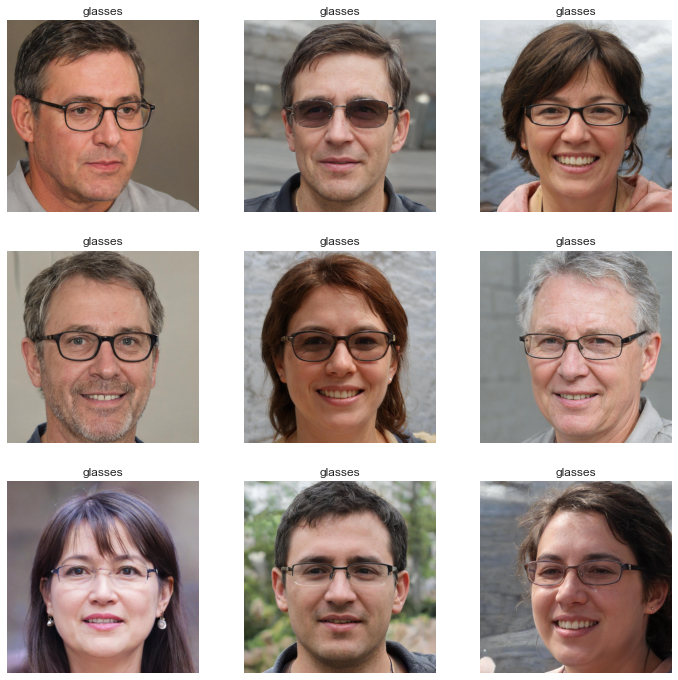

In [4]:
with open("list_images_glasses.txt", "rb") as fp:
    glasses = pickle.load(fp)
plt.figure(figsize=(12, 12))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(glasses))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(glasses[ran_num[i]]))
    plt.title("glasses")
    plt.axis("off")

In [10]:
df_images_glasses = pd.DataFrame()
df_images_glasses["File_Name"] = name_glasses
df_images_glasses["Class"] = "Glasses"
df_images_glasses

,File_Name,Class
0,face-10.jpg,Glasses
1,face-100.jpg,Glasses
2,face-1001.jpg,Glasses
3,face-1002.jpg,Glasses
4,face-1003.jpg,Glasses
...,...,...
2764,face-988.jpg,Glasses
2765,face-993.jpg,Glasses
2766,face-994.jpg,Glasses
2767,face-997.jpg,Glasses


In [11]:
list_images_no_glasses = []
name_No_glasses = []
for dirname_2, _, filenames_2 in os.walk('Images\\no_glasses'):
    for filename in filenames_2:
        list_images_no_glasses.append(os.path.join(dirname_2, filename))
        name_No_glasses.append(filename)
list_images_no_glasses

['Images\\no_glasses\\face-1.jpg',
 'Images\\no_glasses\\face-1000.jpg',
 'Images\\no_glasses\\face-1004.jpg',
 'Images\\no_glasses\\face-1007.jpg',
 'Images\\no_glasses\\face-1009.jpg',
 'Images\\no_glasses\\face-1010.jpg',
 'Images\\no_glasses\\face-1015.jpg',
 'Images\\no_glasses\\face-1016.jpg',
 'Images\\no_glasses\\face-1018.jpg',
 'Images\\no_glasses\\face-1019.jpg',
 'Images\\no_glasses\\face-102.jpg',
 'Images\\no_glasses\\face-1020.jpg',
 'Images\\no_glasses\\face-1021.jpg',
 'Images\\no_glasses\\face-1022.jpg',
 'Images\\no_glasses\\face-1024.jpg',
 'Images\\no_glasses\\face-1025.jpg',
 'Images\\no_glasses\\face-1026.jpg',
 'Images\\no_glasses\\face-1027.jpg',
 'Images\\no_glasses\\face-1028.jpg',
 'Images\\no_glasses\\face-1032.jpg',
 'Images\\no_glasses\\face-1035.jpg',
 'Images\\no_glasses\\face-1036.jpg',
 'Images\\no_glasses\\face-1037.jpg',
 'Images\\no_glasses\\face-1038.jpg',
 'Images\\no_glasses\\face-104.jpg',
 'Images\\no_glasses\\face-1041.jpg',
 'Images\\no_glas

In [12]:
open_file = open("list_images_no_glasses.txt", "wb")
pickle.dump(list_images_no_glasses, open_file)
open_file.close()

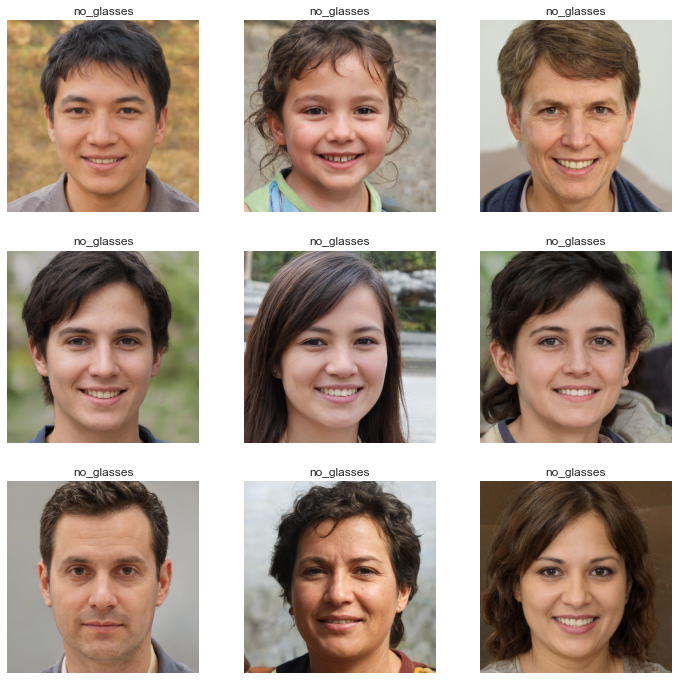

In [13]:
with open("list_images_no_glasses.txt", "rb") as fp: 
    no_glasses = pickle.load(fp)
plt.figure(figsize=(12, 12))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(no_glasses))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(no_glasses[ran_num[i]]))
    plt.title("no_glasses")
    plt.axis("off")

In [16]:
df_images_no_glasses = pd.DataFrame()
df_images_no_glasses["File_Name"] = name_No_glasses
df_images_no_glasses["Class"] = "No_Glasses"
df_images_no_glasses

,File_Name,Class
0,face-1.jpg,No_Glasses
1,face-1000.jpg,No_Glasses
2,face-1004.jpg,No_Glasses
3,face-1007.jpg,No_Glasses
4,face-1009.jpg,No_Glasses
...,...,...
2146,face-991.jpg,No_Glasses
2147,face-992.jpg,No_Glasses
2148,face-995.jpg,No_Glasses
2149,face-996.jpg,No_Glasses


In [17]:
df_all_images = pd.concat([df_images_glasses, df_images_no_glasses], ignore_index=True)
df_all_images

,File_Name,Class
0,face-10.jpg,Glasses
1,face-100.jpg,Glasses
2,face-1001.jpg,Glasses
3,face-1002.jpg,Glasses
4,face-1003.jpg,Glasses
...,...,...
4915,face-991.jpg,No_Glasses
4916,face-992.jpg,No_Glasses
4917,face-995.jpg,No_Glasses
4918,face-996.jpg,No_Glasses


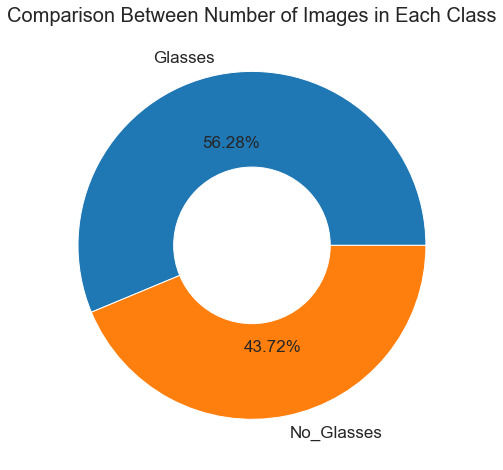

In [18]:
plt.figure(figsize=(8,8))
plt.pie(x=df_all_images['Class'].value_counts(),labels=list(df_all_images['Class'].value_counts().index)
        ,autopct='%.2f%%',textprops={'fontsize': 17})

plt.title('Comparison Between Number of Images in Each Class',fontdict={'fontsize':20})
centre_circle = plt.Circle((0,0),0.45,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle);

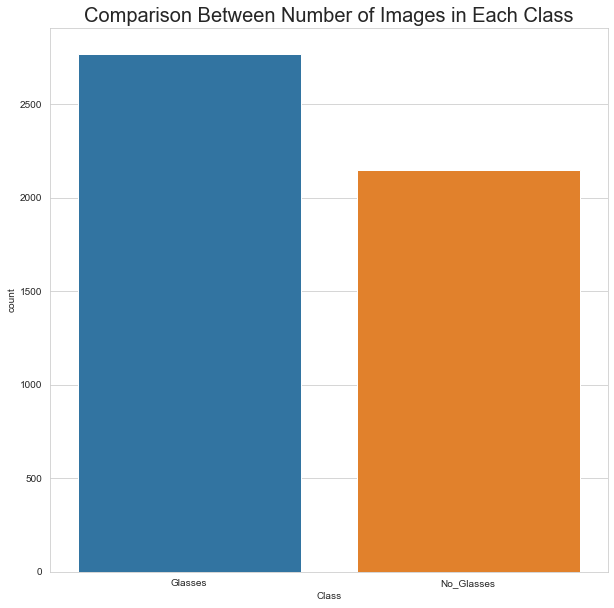

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(x = "Class", data = df_all_images)
plt.title('Comparison Between Number of Images in Each Class',fontdict={'fontsize':20});

# Prepare Images for Modeling

In [31]:
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    x = image.img_to_array(img)
    return x

In [32]:
images = []
labels = []

directory = os.fsencode('Images')

for folder in os.listdir(directory):
    label = os.fsdecode(folder)
    for img in os.listdir(f'Images/{label}'):
        img_name = os.fsdecode(img)
        images.append(prepare_image(f'Images/{label}/{img_name}'))
        labels.append(label)

In [33]:
label_0_1 = [int(labels[w].replace('no_glasses', "0").replace("glasses",'1')) for w in range(len(labels))]
label_0_1

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [34]:
X_digits, Y_digits = images, label_0_1

In [35]:
X = np.array(X_digits)

In [36]:
open_file = open("X_128x128.txt", "wb")
pickle.dump(X, open_file)
open_file.close()

In [37]:
Y = np.array(Y_digits)

In [38]:
open_file = open("Y_128x128.txt", "wb")
pickle.dump(Y, open_file)
open_file.close()

In [ ]:
with open("X_128x128.txt", "rb") as fp: 
    X = pickle.load(fp)

In [ ]:
with open("Y_128x128.txt", "rb") as fp: 
    Y = pickle.load(fp)

### Data Spliting

80% for training, 10% for validation , 10% for testing

In [39]:
X_train_val, X_test, y_train_val, y_test = (train_test_split(X, Y, test_size = .1, random_state = 42))
X_train, X_val, y_train, y_val = (train_test_split(X_train_val, y_train_val, test_size = .111, random_state = 42))

In [40]:
y_train_cat = to_categorical(y_train)

In [41]:
X_train_val.shape

(4428, 128, 128, 3)

In [42]:
X_train.shape

(3936, 128, 128, 3)

In [43]:
X_val.shape

(492, 128, 128, 3)

In [44]:
X_test.shape

(492, 128, 128, 3)

# Models

## Logistic Regression

In [45]:
X_trainn = X_train.reshape(3936,128*128*3)
X_vall = X_val.reshape(492,128*128*3)

In [46]:
LR = LogisticRegression()
LR.fit(X_trainn, y_train)
print('The accuracy for training : ',LR.score(X_trainn,y_train))
print('The accuracy for validation: ',LR.score(X_vall,y_val))

C:\Users\ali_m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy for training :  1.0
The accuracy for validation:  0.991869918699187


# Simple NN model

In [47]:
NN_scratch_1 = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                         Flatten(),
                         Dense(40, activation='relu'),
                         Dense(2, activation='softmax')])

NN_scratch_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_scratch_1_model = NN_scratch_1.fit(X_train, y_train_cat, epochs=5, verbose=1, validation_split=0.1)

predict_x = NN_scratch_1.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_scratch_1.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

Epoch 1/5
111/111 [==============================] - 2s 11ms/step - loss: 169.3781 - accuracy: 0.5234 - val_loss: 0.6907 - val_accuracy: 0.5533
Epoch 2/5
111/111 [==============================] - 1s 10ms/step - loss: 0.6891 - accuracy: 0.5610 - val_loss: 0.6888 - val_accuracy: 0.5533
Epoch 3/5
111/111 [==============================] - 1s 10ms/step - loss: 0.6872 - accuracy: 0.5610 - val_loss: 0.6878 - val_accuracy: 0.5533
Epoch 4/5
111/111 [==============================] - 1s 10ms/step - loss: 0.6863 - accuracy: 0.5610 - val_loss: 0.6875 - val_accuracy: 0.5533
Epoch 5/5
111/111 [==============================] - 1s 10ms/step - loss: 0.6860 - accuracy: 0.5610 - val_loss: 0.6875 - val_accuracy: 0.5533
Training: 0.5602134146341463
Vali: 0.5447154471544715


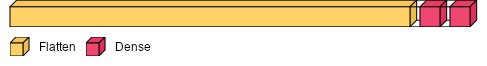

In [49]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_scratch_1, legend=True, font=font)

In [50]:
keras2ascii(NN_scratch_1)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    128  128    3
             Flatten   ||||| -------------------         0     0.0%
                       #####       49152
               Dense   XXXXX -------------------   1966120   100.0%
                relu   #####          40
               Dense   XXXXX -------------------        82     0.0%
             softmax   #####           2


Epoch 1/5
99/99 [==============================] - 10s 96ms/step - loss: 1154.3414 - accuracy: 0.7802 - val_loss: 24.3632 - val_accuracy: 0.9454
Epoch 2/5
99/99 [==============================] - 9s 95ms/step - loss: 126.5020 - accuracy: 0.8593 - val_loss: 16.3509 - val_accuracy: 0.9708
Epoch 3/5
99/99 [==============================] - 10s 96ms/step - loss: 312.7506 - accuracy: 0.8234 - val_loss: 107.2457 - val_accuracy: 0.8959
Epoch 4/5
99/99 [==============================] - 9s 93ms/step - loss: 43.5332 - accuracy: 0.9501 - val_loss: 32.7860 - val_accuracy: 0.9607
Epoch 5/5
99/99 [==============================] - 9s 93ms/step - loss: 121.1459 - accuracy: 0.8952 - val_loss: 35.0592 - val_accuracy: 0.9556
Training: 0.961890243902439
Vali: 0.959349593495935


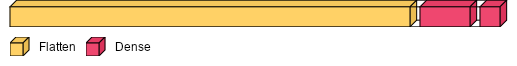

In [52]:
NN_scratch_2_1 = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                         Flatten(),
                         Dense(500, activation='relu'),
                         Dense(2, activation='softmax')])

NN_scratch_2_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_scratch_2_1_model = NN_scratch_2_1.fit(X_train, y_train_cat, epochs=5, verbose=1, validation_split=0.1)

predict_x = NN_scratch_2_1.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_scratch_2_1.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_scratch_2_1, legend=True, font=font)

In [53]:
keras2ascii(NN_scratch_2_1)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    128  128    3
             Flatten   ||||| -------------------         0     0.0%
                       #####       49152
               Dense   XXXXX -------------------  24576500   100.0%
                relu   #####         500
               Dense   XXXXX -------------------      1002     0.0%
             softmax   #####           2


Epoch 1/5
99/99 [==============================] - 10s 97ms/step - loss: 0.8724 - accuracy: 0.5057 - val_loss: 0.6884 - val_accuracy: 0.5558
Epoch 2/5
99/99 [==============================] - 9s 94ms/step - loss: 0.6929 - accuracy: 0.5496 - val_loss: 0.6906 - val_accuracy: 0.5558
Epoch 3/5
99/99 [==============================] - 9s 93ms/step - loss: 0.6977 - accuracy: 0.5368 - val_loss: 0.6961 - val_accuracy: 0.4454
Epoch 4/5
99/99 [==============================] - 9s 93ms/step - loss: 0.7225 - accuracy: 0.5152 - val_loss: 0.6987 - val_accuracy: 0.5571
Epoch 5/5
99/99 [==============================] - 9s 95ms/step - loss: 0.7002 - accuracy: 0.5172 - val_loss: 0.6870 - val_accuracy: 0.5571
Training: 0.5602134146341463
Vali: 0.5447154471544715


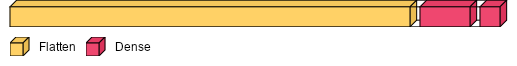

In [55]:
NN_scratch_2_2 = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                         Flatten(),
                         Dense(500, activation='tanh'),
                         Dense(2, activation='softmax')])

NN_scratch_2_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_scratch_2_2_model = NN_scratch_2_2.fit(X_train, y_train_cat, epochs=5, verbose=1, validation_split=0.1)

predict_x = NN_scratch_2_2.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_scratch_2_2.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_scratch_2_2, legend=True, font=font)

In [56]:
keras2ascii(NN_scratch_2_2)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    128  128    3
             Flatten   ||||| -------------------         0     0.0%
                       #####       49152
               Dense   XXXXX -------------------  24576500   100.0%
                tanh   #####         500
               Dense   XXXXX -------------------      1002     0.0%
             softmax   #####           2


Epoch 1/5
111/111 [==============================] - 11s 96ms/step - loss: 11597.6621 - accuracy: 0.7363 - val_loss: 156.5899 - val_accuracy: 0.9213
Epoch 2/5
111/111 [==============================] - 11s 95ms/step - loss: 99.4982 - accuracy: 0.9255 - val_loss: 123.5536 - val_accuracy: 0.8832
Epoch 3/5
111/111 [==============================] - 10s 92ms/step - loss: 124.2661 - accuracy: 0.9133 - val_loss: 55.0913 - val_accuracy: 0.9670
Epoch 4/5
111/111 [==============================] - 10s 93ms/step - loss: 128.2748 - accuracy: 0.9204 - val_loss: 86.1872 - val_accuracy: 0.9391
Epoch 5/5
111/111 [==============================] - 11s 95ms/step - loss: 96.7388 - accuracy: 0.9345 - val_loss: 328.4525 - val_accuracy: 0.8299
Training: 0.845020325203252
Vali: 0.8434959349593496


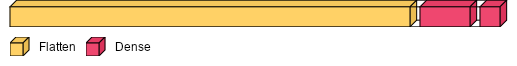

In [61]:
NN_scratch_2_3 = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                         Flatten(),
                         Dense(500),
                         Dense(2, activation='softmax')])

NN_scratch_2_3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_scratch_2_3_model = NN_scratch_2_3.fit(X_train, y_train_cat, epochs=5, verbose=1, validation_split=0.1)

predict_x = NN_scratch_2_3.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_scratch_2_3.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_scratch_2_3, legend=True, font=font)

In [62]:
keras2ascii(NN_scratch_2_3)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    128  128    3
             Flatten   ||||| -------------------         0     0.0%
                       #####       49152
               Dense   XXXXX -------------------  24576500   100.0%
                       #####         500
               Dense   XXXXX -------------------      1002     0.0%
             softmax   #####           2


notice the diffrent between "relu" , "tanh" , and without activation (linear)

Epoch 1/5
111/111 [==============================] - 20s 178ms/step - loss: 1263.5887 - accuracy: 0.7575 - val_loss: 185.7465 - val_accuracy: 0.9036
Epoch 2/5
111/111 [==============================] - 20s 178ms/step - loss: 456.0407 - accuracy: 0.8515 - val_loss: 96.8792 - val_accuracy: 0.9518
Epoch 3/5
111/111 [==============================] - 20s 178ms/step - loss: 101.4291 - accuracy: 0.9345 - val_loss: 44.5100 - val_accuracy: 0.9365
Epoch 4/5
111/111 [==============================] - 20s 180ms/step - loss: 138.5267 - accuracy: 0.9178 - val_loss: 25.0753 - val_accuracy: 0.9721
Epoch 5/5
111/111 [==============================] - 20s 178ms/step - loss: 44.3578 - accuracy: 0.9650 - val_loss: 137.4388 - val_accuracy: 0.9188
Training: 0.9222560975609756
Vali: 0.9085365853658537


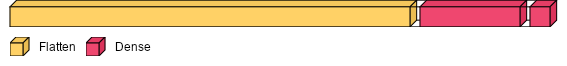

In [57]:
NN_scratch_3 = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                         Flatten(),
                         Dense(1000, activation='relu'),
                         Dense(2, activation='softmax')])

NN_scratch_3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_scratch_3_model = NN_scratch_3.fit(X_train, y_train_cat, epochs=5, verbose=1, validation_split=0.1)

predict_x = NN_scratch_3.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_scratch_3.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_scratch_3, legend=True, font=font)

In [58]:
keras2ascii(NN_scratch_3)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    128  128    3
             Flatten   ||||| -------------------         0     0.0%
                       #####       49152
               Dense   XXXXX -------------------  49153000   100.0%
                relu   #####        1000
               Dense   XXXXX -------------------      2002     0.0%
             softmax   #####           2


Epoch 1/5
111/111 [==============================] - 32s 282ms/step - loss: 2581.8625 - accuracy: 0.7228 - val_loss: 140.4614 - val_accuracy: 0.8731
Epoch 2/5
111/111 [==============================] - 31s 275ms/step - loss: 82.9819 - accuracy: 0.9068 - val_loss: 7.9379 - val_accuracy: 0.9695
Epoch 3/5
111/111 [==============================] - 31s 276ms/step - loss: 89.4966 - accuracy: 0.9006 - val_loss: 18.4525 - val_accuracy: 0.9594
Epoch 4/5
111/111 [==============================] - 31s 276ms/step - loss: 40.1531 - accuracy: 0.9452 - val_loss: 867.4278 - val_accuracy: 0.5482
Epoch 5/5
111/111 [==============================] - 31s 275ms/step - loss: 179.8161 - accuracy: 0.8532 - val_loss: 56.6587 - val_accuracy: 0.9289
Training: 0.9214939024390244
Vali: 0.9186991869918699


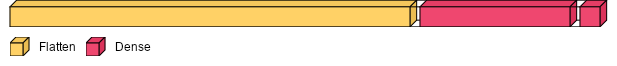

In [59]:
NN_scratch_4 = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                         Flatten(),
                         Dense(1500, activation='relu'),
                         Dense(2, activation='softmax')])

NN_scratch_4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_scratch_4_model = NN_scratch_4.fit(X_train, y_train_cat, epochs=5, verbose=1, validation_split=0.1)

predict_x = NN_scratch_4.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_scratch_4.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_scratch_4, legend=True, font=font)

In [60]:
keras2ascii(NN_scratch_4)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    128  128    3
             Flatten   ||||| -------------------         0     0.0%
                       #####       49152
               Dense   XXXXX -------------------  73729500   100.0%
                relu   #####        1500
               Dense   XXXXX -------------------      3002     0.0%
             softmax   #####           2


Testing the best model (500 hidden units) with images from the internet the moddel has not seen them before

In [107]:
classes = ["No glasses","glasses"]

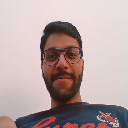

In [64]:
img = image.load_img(f"Ali.jpg",target_size=(128,128))
img

In [65]:
Z = image.img_to_array(img)
Z = np.expand_dims(Z,axis=0)
images = np.vstack([Z])
val = NN_scratch_2_1.predict([images])
ind = max(val).argmax()
print(classes[ind])

glasses


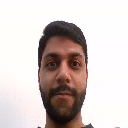

In [66]:
img_2 = image.load_img(f"Ali_noglasses_1.jpg",target_size=(128,128))
img_2

In [67]:
Z = image.img_to_array(img_2)
Z = np.expand_dims(Z,axis=0)
images = np.vstack([Z])
val = NN_scratch_2_1.predict([images])
ind = max(val).argmax()
print(classes[ind])

glasses


The model has failed to predect my image without glasses

# Adding Layers to NN

Epoch 1/5
111/111 [==============================] - 11s 98ms/step - loss: 887.1443 - accuracy: 0.6728 - val_loss: 26.2485 - val_accuracy: 0.9137
Epoch 2/5
111/111 [==============================] - 10s 90ms/step - loss: 68.7475 - accuracy: 0.8408 - val_loss: 72.0275 - val_accuracy: 0.8376
Epoch 3/5
111/111 [==============================] - 10s 89ms/step - loss: 41.7695 - accuracy: 0.8947 - val_loss: 21.9912 - val_accuracy: 0.8934
Epoch 4/5
111/111 [==============================] - 10s 92ms/step - loss: 25.2482 - accuracy: 0.9190 - val_loss: 6.0849 - val_accuracy: 0.9645
Epoch 5/5
111/111 [==============================] - 10s 92ms/step - loss: 9.6360 - accuracy: 0.9478 - val_loss: 6.4786 - val_accuracy: 0.9645
Training: 0.9738313008130082
Vali: 0.959349593495935


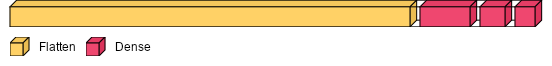

In [69]:
NN_1 = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                         Flatten(),
                         Dense(500, activation='relu'),
                         Dense(250, activation='relu'),
                         Dense(2, activation='softmax')])

NN_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
NN_1_model = NN_1.fit(X_train, y_train_cat, epochs=5, verbose=1,  validation_split=0.1)

predict_x = NN_1.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_1.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_1, legend=True, font=font)

In [70]:
keras2ascii(NN_1)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    128  128    3
             Flatten   ||||| -------------------         0     0.0%
                       #####       49152
               Dense   XXXXX -------------------  24576500    99.5%
                relu   #####         500
               Dense   XXXXX -------------------    125250     0.5%
                relu   #####         250
               Dense   XXXXX -------------------       502     0.0%
             softmax   #####           2


Epoch 1/5
111/111 [==============================] - 11s 94ms/step - loss: 790.1023 - accuracy: 0.5839 - val_loss: 23.7746 - val_accuracy: 0.7640
Epoch 2/5
111/111 [==============================] - 10s 92ms/step - loss: 13.5031 - accuracy: 0.8388 - val_loss: 4.8415 - val_accuracy: 0.9213
Epoch 3/5
111/111 [==============================] - 10s 93ms/step - loss: 9.4979 - accuracy: 0.8831 - val_loss: 10.9743 - val_accuracy: 0.8604
Epoch 4/5
111/111 [==============================] - 10s 92ms/step - loss: 8.0363 - accuracy: 0.8868 - val_loss: 2.6862 - val_accuracy: 0.9467
Epoch 5/5
111/111 [==============================] - 10s 93ms/step - loss: 4.7627 - accuracy: 0.9201 - val_loss: 1.9714 - val_accuracy: 0.9569
Training: 0.9705284552845529
Vali: 0.9654471544715447


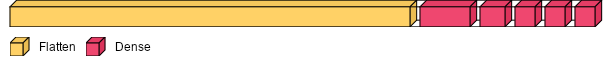

In [71]:
NN_2 = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                         Flatten(),
                         Dense(500, activation='relu'),
                         Dense(250, activation='relu'),
                         Dense(125, activation='relu'),
                         Dense(75, activation='relu'),
                         Dense(2, activation='softmax')])

NN_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
NN_2_model = NN_2.fit(X_train, y_train_cat, epochs=5, verbose=1,  validation_split=0.1)

predict_x = NN_2.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_2.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_2, legend=True, font=font)

In [72]:
keras2ascii(NN_2)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    128  128    3
             Flatten   ||||| -------------------         0     0.0%
                       #####       49152
               Dense   XXXXX -------------------  24576500    99.3%
                relu   #####         500
               Dense   XXXXX -------------------    125250     0.5%
                relu   #####         250
               Dense   XXXXX -------------------     31375     0.1%
                relu   #####         125
               Dense   XXXXX -------------------      9450     0.0%
                relu   #####          75
               Dense   XXXXX -------------------       152     0.0%
             softmax   #####           2


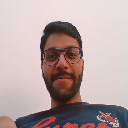

In [75]:
img

In [76]:
Z = image.img_to_array(img)
Z = np.expand_dims(Z,axis=0)
images = np.vstack([Z])
val = NN_2.predict([images])
ind = max(val).argmax()
print(classes[ind])

No glasses


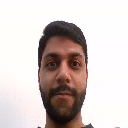

In [77]:
img_2

In [82]:
Z = image.img_to_array(img_2)
Z = np.expand_dims(Z,axis=0)
images = np.vstack([Z])
val = NN_2.predict([images])
ind = max(val).argmax()
print(classes[ind])

No glasses


The model has failed to predect my image with glasses after adding 3 extra hidden layers

# CNN model

Epoch 1/5
111/111 [==============================] - 34s 299ms/step - loss: 89.5567 - accuracy: 0.6801 - val_loss: 0.4045 - val_accuracy: 0.8249
Epoch 2/5
111/111 [==============================] - 37s 335ms/step - loss: 0.2509 - accuracy: 0.9082 - val_loss: 0.2853 - val_accuracy: 0.9010
Epoch 3/5
111/111 [==============================] - 34s 309ms/step - loss: 0.1115 - accuracy: 0.9636 - val_loss: 0.0748 - val_accuracy: 0.9721
Epoch 4/5
111/111 [==============================] - 34s 307ms/step - loss: 0.0565 - accuracy: 0.9791 - val_loss: 0.1156 - val_accuracy: 0.9797
Epoch 5/5
111/111 [==============================] - 34s 305ms/step - loss: 0.0332 - accuracy: 0.9884 - val_loss: 0.0770 - val_accuracy: 0.9822
Training: 0.9949186991869918
Vali: 0.9715447154471545


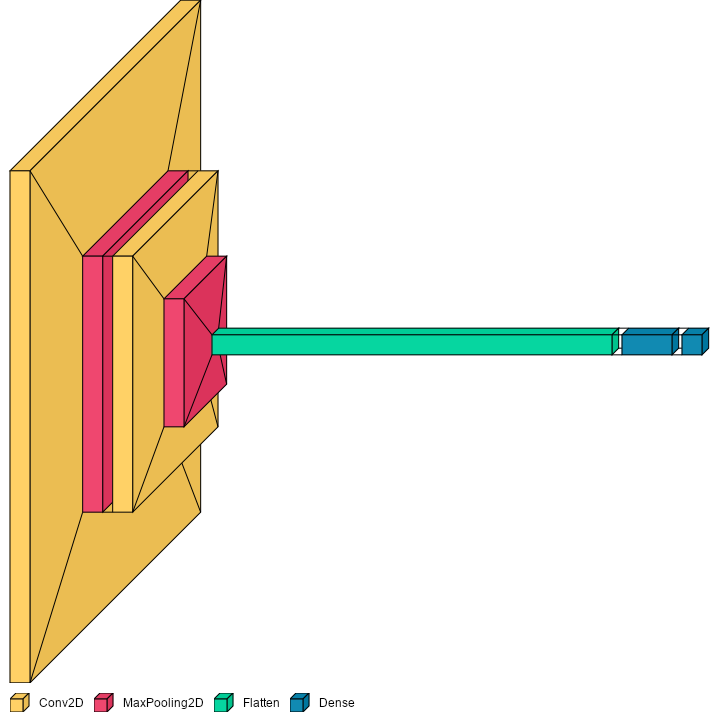

In [84]:
CNN_1 = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                     Conv2D(filters=16, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(500, activation='relu'),
                     Dense(2, activation='softmax')])

CNN_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
CNN_1_model = CNN_1.fit(X_train, y_train_cat, epochs=5, verbose=1,  validation_split=0.1)

predict_x = CNN_1.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = CNN_1.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(CNN_1, legend=True, font=font)

In [85]:
keras2ascii(CNN_1)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    128  128    3
              Conv2D    \|/  -------------------      1216     0.0%
                relu   #####    128  128   16
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     64   64   16
              Conv2D    \|/  -------------------     12832     0.1%
                relu   #####     64   64   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     32   32   32
             Flatten   ||||| -------------------         0     0.0%
                       #####       32768
               Dense   XXXXX -------------------  16384500    99.9%
                relu   #####         500
               Dense   XXXXX -------------------      1002     0.0%
             softmax   #####           2


Epoch 1/5
111/111 [==============================] - 34s 289ms/step - loss: 21.5610 - accuracy: 0.6494 - val_loss: 0.5437 - val_accuracy: 0.7411
Epoch 2/5
111/111 [==============================] - 34s 302ms/step - loss: 0.3667 - accuracy: 0.8487 - val_loss: 0.2209 - val_accuracy: 0.9010
Epoch 3/5
111/111 [==============================] - 34s 304ms/step - loss: 0.4622 - accuracy: 0.7318 - val_loss: 0.6875 - val_accuracy: 0.5533
Epoch 4/5
111/111 [==============================] - 34s 304ms/step - loss: 0.6848 - accuracy: 0.5757 - val_loss: 0.6846 - val_accuracy: 0.5609
Epoch 5/5
111/111 [==============================] - 34s 302ms/step - loss: 0.6551 - accuracy: 0.6155 - val_loss: 0.5882 - val_accuracy: 0.6701
Training: 0.7019817073170732
Vali: 0.6707317073170732


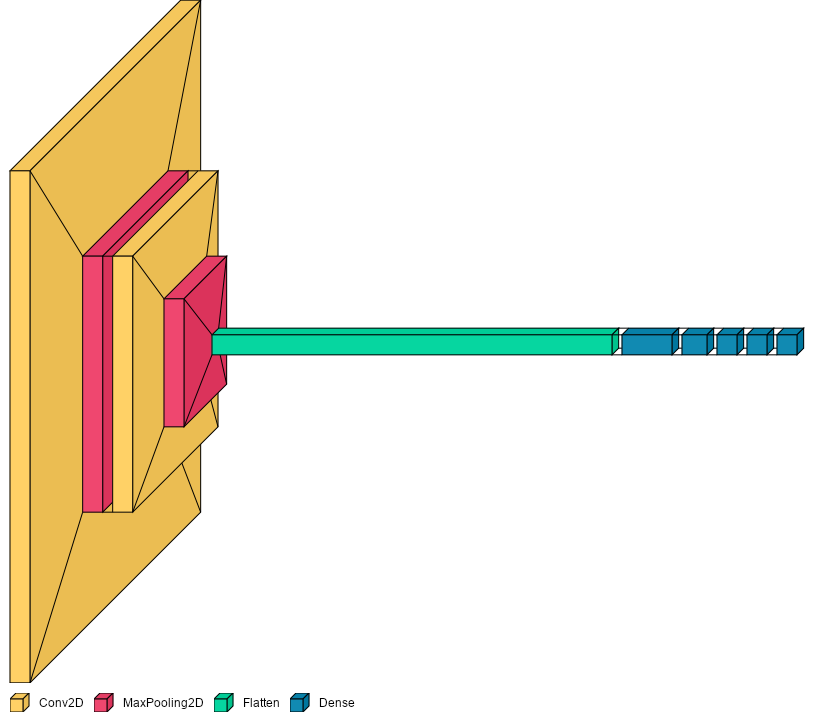

In [86]:
CNN_2 = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                     Conv2D(filters=16, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(500, activation='relu'),
                     Dense(250, activation='relu'),
                     Dense(125, activation='relu'),
                     Dense(75, activation='relu'),
                     Dense(2, activation='softmax')])

CNN_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
CNN_2_model = CNN_2.fit(X_train, y_train_cat, epochs=5, verbose=1,  validation_split=0.1)

predict_x = CNN_2.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = CNN_2.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(CNN_2, legend=True, font=font)

In [87]:
keras2ascii(CNN_2)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    128  128    3
              Conv2D    \|/  -------------------      1216     0.0%
                relu   #####    128  128   16
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     64   64   16
              Conv2D    \|/  -------------------     12832     0.1%
                relu   #####     64   64   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     32   32   32
             Flatten   ||||| -------------------         0     0.0%
                       #####       32768
               Dense   XXXXX -------------------  16384500    98.9%
                relu   #####         500
               Dense   XXXXX -------------------    125250     0.8%
                relu   #####         250
               Dense   XXXXX -------------------     31375     0.2%
                relu   ##### 

Epoch 1/5
111/111 [==============================] - 37s 327ms/step - loss: 10.5959 - accuracy: 0.5658 - val_loss: 0.7118 - val_accuracy: 0.6751
Epoch 2/5
111/111 [==============================] - 38s 342ms/step - loss: 0.6523 - accuracy: 0.6231 - val_loss: 0.6336 - val_accuracy: 0.6345
Epoch 3/5
111/111 [==============================] - 38s 345ms/step - loss: 0.4158 - accuracy: 0.8041 - val_loss: 0.1311 - val_accuracy: 0.9467
Epoch 4/5
111/111 [==============================] - 38s 344ms/step - loss: 0.0786 - accuracy: 0.9698 - val_loss: 0.0654 - val_accuracy: 0.9746
Epoch 5/5
111/111 [==============================] - 38s 344ms/step - loss: 0.0327 - accuracy: 0.9876 - val_loss: 0.0218 - val_accuracy: 0.9924
Training: 0.9949186991869918
Vali: 0.991869918699187


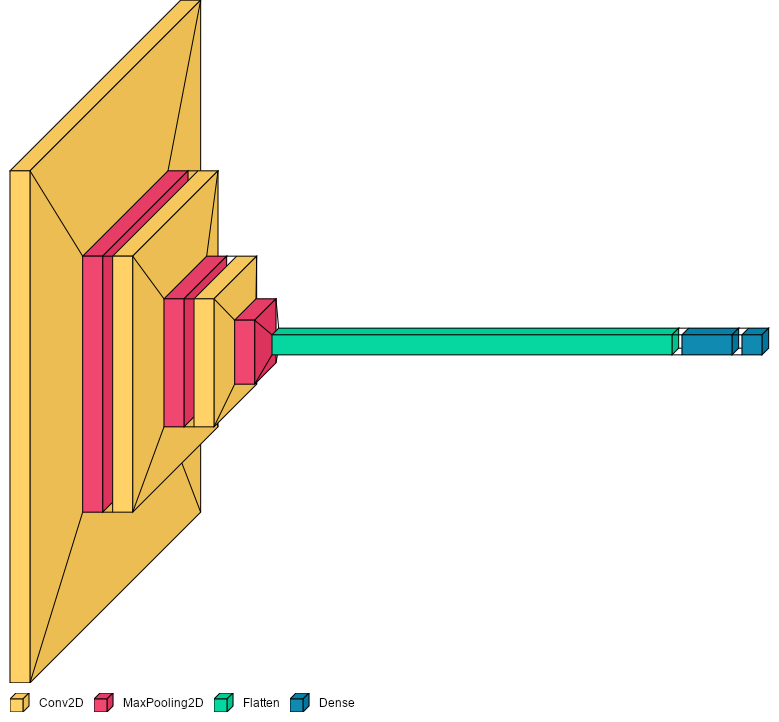

In [90]:
CNN_3 = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                     Conv2D(filters=16, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=64, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(500, activation='relu'),
                     Dense(2, activation='softmax')])

CNN_3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
CNN_3_model = CNN_3.fit(X_train, y_train_cat, epochs=5, verbose=1,  validation_split=0.1)

predict_x = CNN_3.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = CNN_3.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(CNN_3, legend=True, font=font)

In [91]:
keras2ascii(CNN_3)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    128  128    3
              Conv2D    \|/  -------------------      1216     0.0%
                relu   #####    128  128   16
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     64   64   16
              Conv2D    \|/  -------------------     12832     0.2%
                relu   #####     64   64   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     32   32   32
              Conv2D    \|/  -------------------     51264     0.6%
                relu   #####     32   32   64
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     16   16   64
             Flatten   ||||| -------------------         0     0.0%
                       #####       16384
               Dense   XXXXX -------------------   8192500    99.2%
                rel

Epoch 1/5
111/111 [==============================] - 41s 370ms/step - loss: 6.5246 - accuracy: 0.8523 - val_loss: 0.0584 - val_accuracy: 0.9848
Epoch 2/5
111/111 [==============================] - 43s 388ms/step - loss: 0.0405 - accuracy: 0.9873 - val_loss: 0.0628 - val_accuracy: 0.9873
Epoch 3/5
111/111 [==============================] - 43s 390ms/step - loss: 0.0279 - accuracy: 0.9927 - val_loss: 0.0086 - val_accuracy: 0.9949
Epoch 4/5
111/111 [==============================] - 43s 389ms/step - loss: 0.0125 - accuracy: 0.9960 - val_loss: 0.0254 - val_accuracy: 0.9949
Epoch 5/5
111/111 [==============================] - 44s 397ms/step - loss: 0.0246 - accuracy: 0.9912 - val_loss: 0.0186 - val_accuracy: 0.9949
Training: 0.9966971544715447
Vali: 0.9959349593495935


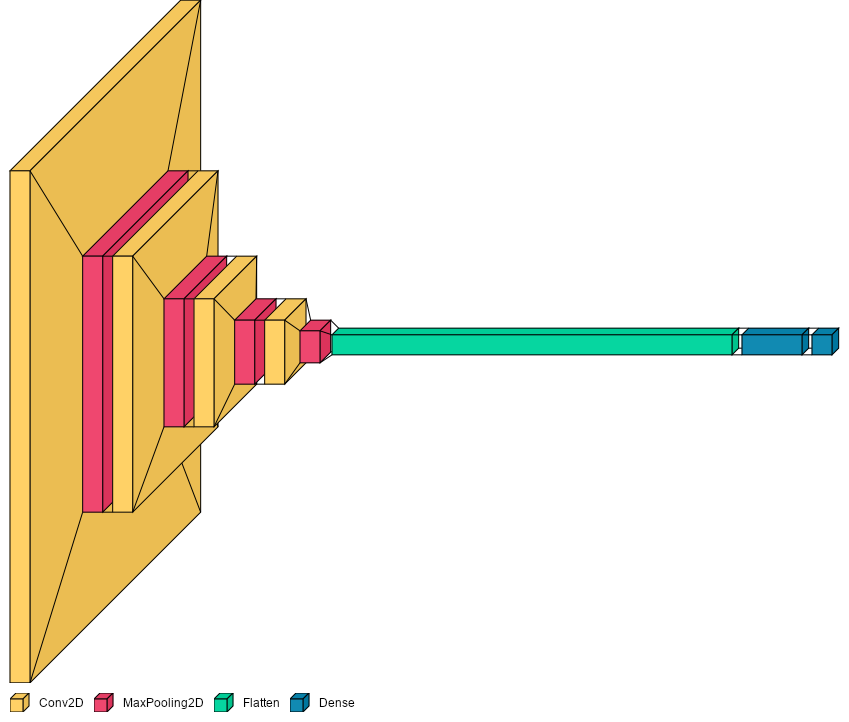

In [103]:
CNN_4 = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                     Conv2D(filters=16, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=64, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=128, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(600, activation='relu'),
                     Dense(2, activation='softmax')])

CNN_4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
CNN_4_model = CNN_4.fit(X_train, y_train_cat, epochs=5, verbose=1,  validation_split=0.1)

predict_x = CNN_4.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = CNN_4.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(CNN_4, legend=True, font=font)

In [148]:
CNN_4.save("CNN_4")

INFO:tensorflow:Assets written to: CNN_4\assets


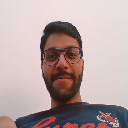

In [114]:
img

In [124]:
Z = image.img_to_array(img)
Z = np.expand_dims(Z,axis=0)
images = np.vstack([Z])
val = CNN_4.predict([images])
ind = max(val).argmax()
print(classes[ind])

No glasses


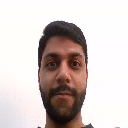

In [117]:
img_2

In [125]:
Z = image.img_to_array(img_2)
Z = np.expand_dims(Z,axis=0)
images = np.vstack([Z])
val = CNN_4.predict([images])
ind = max(val).argmax()
print(classes[ind])

No glasses


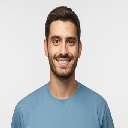

In [118]:
img_3 = image.load_img(f"NoGlasses_2.jpg",target_size=(128,128))
img_3

In [119]:
Z = image.img_to_array(img_3)
Z = np.expand_dims(Z,axis=0)
images = np.vstack([Z])
val = CNN_4.predict([images])
ind = max(val).argmax()
print(classes[ind])

No glasses


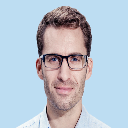

In [120]:
img_4 = image.load_img(f"glasses.jpg",target_size=(128,128))
img_4

In [121]:
Z = image.img_to_array(img_4)
Z = np.expand_dims(Z,axis=0)
images = np.vstack([Z])
val = CNN_4.predict([images])
ind = max(val).argmax()
print(classes[ind])

glasses


# Transsfer learing

In [126]:
base = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))

# Freeze convolutional layers
for layer in base.layers:
    layer.trainable = False  

NN_transfer_1 = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                         base,
                         Flatten(),
                         Dense(500, activation='relu'),
                         Dense(2, activation='softmax')])

NN_transfer_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_transfer_1_model = NN_transfer_1.fit(X_train, y_train_cat, epochs=5, verbose=1,validation_split=0.1)

predict_x = NN_transfer_1.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_transfer_1.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

Epoch 1/5
111/111 [==============================] - 169s 2s/step - loss: 2.5633 - accuracy: 0.9280 - val_loss: 0.1106 - val_accuracy: 0.9873
Epoch 2/5
111/111 [==============================] - 175s 2s/step - loss: 0.0697 - accuracy: 0.9856 - val_loss: 0.0408 - val_accuracy: 0.9873
Epoch 3/5
111/111 [==============================] - 175s 2s/step - loss: 0.0190 - accuracy: 0.9952 - val_loss: 0.0944 - val_accuracy: 0.9848
Epoch 4/5
111/111 [==============================] - 185s 2s/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.0691 - val_accuracy: 0.9848
Epoch 5/5
111/111 [==============================] - 191s 2s/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.1079 - val_accuracy: 0.9848
Training: 0.9972052845528455
Vali: 0.975609756097561


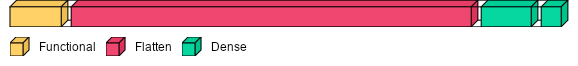

In [127]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_transfer_1, legend=True, font=font)

In [128]:
keras2ascii(NN_transfer_1)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    128  128    3
          Functional   ????? -------------------  14714688    78.2%
                       #####      4    4  512
             Flatten   ||||| -------------------         0     0.0%
                       #####        8192
               Dense   XXXXX -------------------   4096500    21.8%
                relu   #####         500
               Dense   XXXXX -------------------      1002     0.0%
             softmax   #####           2


In [149]:
NN_transfer_1.save("NN_transfer_VGG16")

INFO:tensorflow:Assets written to: NN_transfer_VGG16\assets


In [131]:
base = Xception(weights='imagenet', include_top=False, input_shape=(128,128,3))

# Freeze convolutional layers
for layer in base.layers:
    layer.trainable = False  

NN_transfer_2 = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                         base,
                         Flatten(),
                         Dense(500, activation='relu'),
                         Dense(2, activation='softmax')])

NN_transfer_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_transfer_2_model = NN_transfer_2.fit(X_train, y_train_cat, epochs=5, verbose=1,validation_split=0.1 ,callbacks=[EarlyStopping()])

predict_x = NN_transfer_2.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_transfer_2.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

Epoch 1/5
111/111 [==============================] - 83s 737ms/step - loss: 11.2856 - accuracy: 0.7459 - val_loss: 0.4521 - val_accuracy: 0.8756
Epoch 2/5
111/111 [==============================] - 81s 729ms/step - loss: 0.2619 - accuracy: 0.9009 - val_loss: 0.3740 - val_accuracy: 0.8883
Training: 0.8991361788617886
Vali: 0.8638211382113821


In [150]:
NN_transfer_2.save("NN_transfer_Xception")

INFO:tensorflow:Assets written to: NN_transfer_Xception\assets


C:\Users\ali_m\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\Users\ali_m\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [133]:
base = ResNet50(weights='imagenet', include_top=False, input_shape=(128,128,3))

# Freeze convolutional layers
for layer in base.layers:
    layer.trainable = False  

NN_transfer_3 = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                         base,
                         Flatten(),
                         Dense(500, activation='relu'),
                         Dense(2, activation='softmax')])

NN_transfer_3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_transfer_3_model = NN_transfer_3.fit(X_train, y_train_cat, epochs=5, verbose=1,validation_split=0.1 ,callbacks=[EarlyStopping()])

predict_x = NN_transfer_3.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_transfer_3.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

Epoch 1/5
111/111 [==============================] - 83s 729ms/step - loss: 2.6500 - accuracy: 0.8924 - val_loss: 0.0326 - val_accuracy: 0.9924
Epoch 2/5
111/111 [==============================] - 84s 758ms/step - loss: 0.0309 - accuracy: 0.9876 - val_loss: 0.0343 - val_accuracy: 0.9873
Training: 0.9966971544715447
Vali: 0.975609756097561


In [151]:
NN_transfer_3.save("NN_transfer_ResNet50")

INFO:tensorflow:Assets written to: NN_transfer_ResNet50\assets


C:\Users\ali_m\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\Users\ali_m\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [134]:
base = MobileNet(weights='imagenet', include_top=False, input_shape=(128,128,3))

# Freeze convolutional layers
for layer in base.layers:
    layer.trainable = False  

NN_transfer_4 = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                         base,
                         Flatten(),
                         Dense(500, activation='relu'),
                         Dense(2, activation='softmax')])

NN_transfer_4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_transfer_4_model = NN_transfer_4.fit(X_train, y_train_cat, epochs=5, verbose=1,validation_split=0.1 ,callbacks=[EarlyStopping()])

predict_x = NN_transfer_4.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_transfer_4.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

Epoch 1/5
111/111 [==============================] - 25s 217ms/step - loss: 1.6153 - accuracy: 0.8298 - val_loss: 0.1960 - val_accuracy: 0.9036
Epoch 2/5
111/111 [==============================] - 24s 213ms/step - loss: 0.1371 - accuracy: 0.9430 - val_loss: 0.1835 - val_accuracy: 0.9010
Training: 0.9720528455284553
Vali: 0.9247967479674797


In [135]:
base = DenseNet121(weights='imagenet', include_top=False, input_shape=(128,128,3))

# Freeze convolutional layers
for layer in base.layers:
    layer.trainable = False  

NN_transfer_5 = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                         base,
                         Flatten(),
                         Dense(500, activation='relu'),
                         Dense(2, activation='softmax')])

NN_transfer_5.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_transfer_5_model = NN_transfer_5.fit(X_train, y_train_cat, epochs=5, verbose=1,validation_split=0.1 ,callbacks=[EarlyStopping()])

predict_x = NN_transfer_5.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_transfer_5.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

Epoch 1/5
111/111 [==============================] - 85s 733ms/step - loss: 6.2511 - accuracy: 0.8123 - val_loss: 0.5545 - val_accuracy: 0.9137
Epoch 2/5
111/111 [==============================] - 82s 743ms/step - loss: 0.2995 - accuracy: 0.9317 - val_loss: 0.3254 - val_accuracy: 0.9162
Training: 0.9435975609756098
Vali: 0.9146341463414634


In [136]:
base = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(128,128,3))

# Freeze convolutional layers
for layer in base.layers:
    layer.trainable = False  

NN_transfer_6 = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                         base,
                         Flatten(),
                         Dense(500, activation='relu'),
                         Dense(2, activation='softmax')])

NN_transfer_6.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_transfer_6_model = NN_transfer_6.fit(X_train, y_train_cat, epochs=5, verbose=1,validation_split=0.1 ,callbacks=[EarlyStopping()])

predict_x = NN_transfer_6.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_transfer_6.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

Epoch 1/5
111/111 [==============================] - 64s 534ms/step - loss: 0.4714 - accuracy: 0.9311 - val_loss: 0.0600 - val_accuracy: 0.9797
Epoch 2/5
111/111 [==============================] - 58s 522ms/step - loss: 0.0489 - accuracy: 0.9836 - val_loss: 0.0291 - val_accuracy: 0.9873
Training: 0.9951727642276422
Vali: 0.9817073170731707


In [152]:
NN_transfer_6.save("NN_transfer_EfficientNetB1")

INFO:tensorflow:Assets written to: NN_transfer_EfficientNetB1\assets


C:\Users\ali_m\Anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\Users\ali_m\Anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [137]:
base = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))

# Freeze convolutional layers
for layer in base.layers:
    layer.trainable = False  

NN_transfer_1_2 = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                         base,
                         Flatten(),
                         Dense(500, activation='relu'),
                         Dense(2, activation='softmax')])

NN_transfer_1_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_transfer_1_2_model = NN_transfer_1_2.fit(X_train, y_train_cat, epochs=5, verbose=1,validation_split=0.1, callbacks=[EarlyStopping()])

predict_x = NN_transfer_1_2.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_transfer_1_2.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

Epoch 1/5
111/111 [==============================] - 179s 2s/step - loss: 4.4882 - accuracy: 0.9085 - val_loss: 0.0777 - val_accuracy: 0.9721
Epoch 2/5
111/111 [==============================] - 196s 2s/step - loss: 0.0308 - accuracy: 0.9898 - val_loss: 0.0232 - val_accuracy: 0.9924
Training: 0.9972052845528455
Vali: 0.9857723577235772


In [ ]:
# To load the saved models
#model = keras.models.load_model('path/to/location')

# Testing the best model

The best model which has the highest validation accuracy and no overfit is (CNN_4).

In [139]:
y_train_val_cat = to_categorical(y_train_val)

In [140]:
CNN_4_Final_model = CNN_4.fit(X_train_val, y_train_val_cat, epochs=5, verbose=1,  validation_split=0.1)

predict_x = CNN_4.predict(X_test)
classes_x = np.argmax(predict_x, axis=1)
predict_r = CNN_4.predict(X_train_val)
classes_r = np.argmax(predict_r, axis=1)
print("=============The Final Model Test=============\n")
print(f"Training: {accuracy_score(y_train_val, classes_r)}")
print(f"validation: {accuracy_score(y_test, classes_x)}")

Epoch 1/5
125/125 [==============================] - 48s 380ms/step - loss: 0.0179 - accuracy: 0.9945 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 2/5
125/125 [==============================] - 49s 389ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.0202 - val_accuracy: 0.9932
Epoch 3/5
125/125 [==============================] - 49s 395ms/step - loss: 0.0086 - accuracy: 0.9977 - val_loss: 0.0095 - val_accuracy: 0.9977
Epoch 4/5
125/125 [==============================] - 49s 390ms/step - loss: 0.0186 - accuracy: 0.9962 - val_loss: 0.0138 - val_accuracy: 0.9955
Epoch 5/5
125/125 [==============================] - 49s 396ms/step - loss: 0.0220 - accuracy: 0.9927 - val_loss: 0.0108 - val_accuracy: 0.9977
=============The Final Model Test=============

Training: 0.9988708220415538
validation: 0.9959349593495935


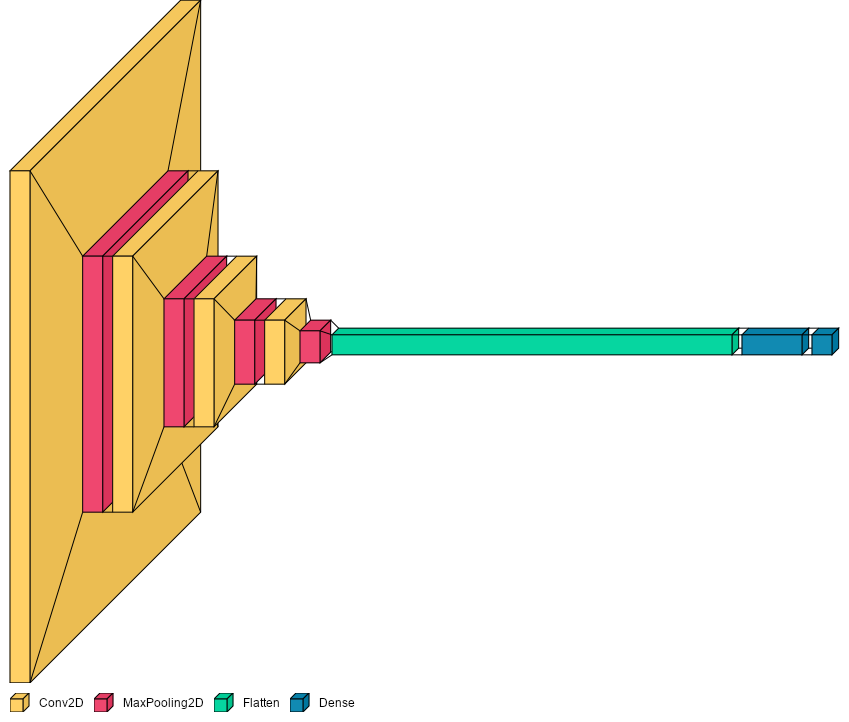

In [141]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(CNN_4, legend=True, font=font)

In [142]:
keras2ascii(CNN_4)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    128  128    3
              Conv2D    \|/  -------------------      1216     0.0%
                relu   #####    128  128   16
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     64   64   16
              Conv2D    \|/  -------------------     12832     0.2%
                relu   #####     64   64   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     32   32   32
              Conv2D    \|/  -------------------     51264     1.0%
                relu   #####     32   32   64
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     16   16   64
              Conv2D    \|/  -------------------    204928     4.0%
                relu   #####     16   16  128
        MaxPooling2D   Y max -------------------         0     0.0%
              

# Augmentation

In [146]:
datagen = ImageDataGenerator(
    rotation_range = 40, 
    width_shift_range = 0.1,
    height_shift_range = 0.1, 
    brightness_range = (0.5, 1),
    shear_range=0.2,
    zoom_range = 0.2,
    horizontal_flip = True, 
    fill_mode='nearest')

Found 1 validated image filenames belonging to 1 classes.


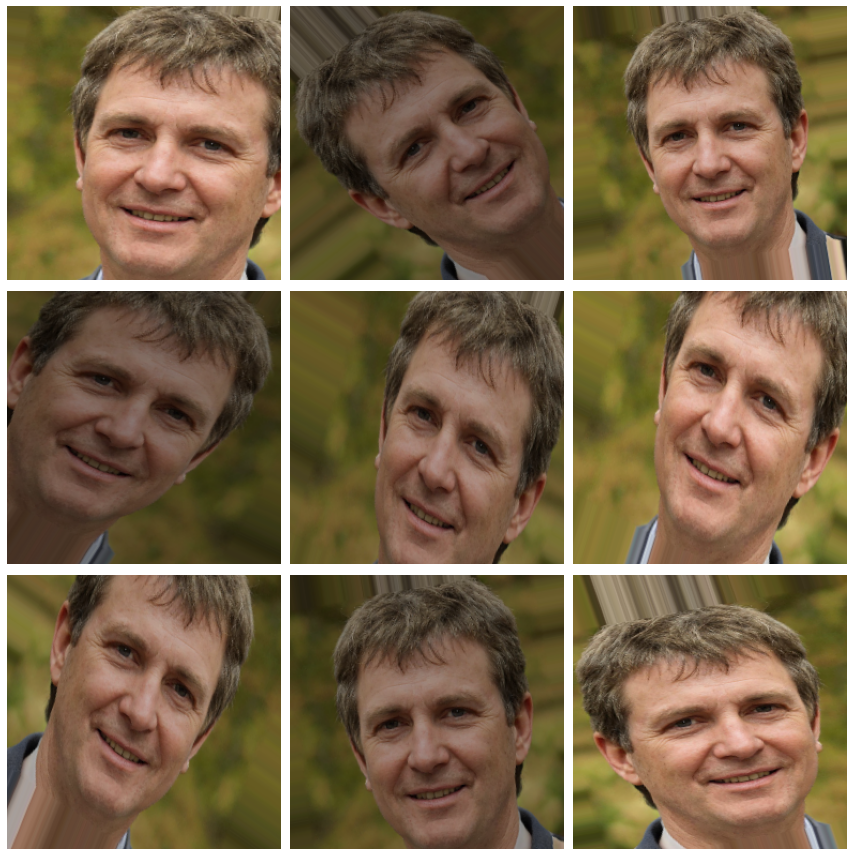

In [147]:
sample_df = df_images_no_glasses.sample(1)

sample_generator = datagen.flow_from_dataframe(
    dataframe = sample_df,
    directory = 'Images\\no_glasses',
    x_col = "File_Name",
    y_col = "Class")

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    for X, y in sample_generator:
        plt.imshow(X[0]/255)
        plt.axis("off")
        break
plt.tight_layout()
plt.show()

Increase the number of inages using augmentation, the below cell is for creating new images by rotating and scaling the original images

In [ ]:
Sample_list_images_no_glasses = random.sample(list_images_no_glasses, 570)
Sample_list_images_glasses = random.sample(list_images_glasses, 446)

In [ ]:
for path in Sample_list_images_glasses:
    img = load_img(path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,save_to_dir='Glasses', save_prefix='glasses', save_format='jpg'):
        i += 1
        if i > 4:
            break
            
for path in Sample_list_images_no_glasses:
    img = load_img(path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,save_to_dir='NoGlasses', save_prefix='no_glasses', save_format='jpg'):
        i += 1
        if i > 4:
            break

In [154]:
list_images_glasses_Aug = []
name_glasses_Aug= []
for dirname, _, filenames in os.walk('Images\glasses'):
    for filename in filenames:
        list_images_glasses_Aug.append(os.path.join(dirname, filename))
        name_glasses_Aug.append(filename)

df_images_glasses_Aug = pd.DataFrame()
df_images_glasses_Aug["File_Name"] = name_glasses_Aug
df_images_glasses_Aug["Class"] = "Glasses"
df_images_glasses_Aug

,File_Name,Class
0,face-10.jpg,Glasses
1,face-100.jpg,Glasses
2,face-1001.jpg,Glasses
3,face-1002.jpg,Glasses
4,face-1003.jpg,Glasses
...,...,...
4765,glasses_0_9976.jpg,Glasses
4766,glasses_0_9981.jpg,Glasses
4767,glasses_0_999.jpg,Glasses
4768,glasses_0_9991.jpg,Glasses


In [155]:
list_images_no_glasses_Aug = []
name_No_glasses_Aug = []
for dirname_2, _, filenames_2 in os.walk('Images\\no_glasses'):
    for filename in filenames_2:
        list_images_no_glasses_Aug.append(os.path.join(dirname_2, filename))
        name_No_glasses_Aug.append(filename)

df_images_no_glasses_Aug = pd.DataFrame()
df_images_no_glasses_Aug["File_Name"] = name_No_glasses_Aug
df_images_no_glasses_Aug["Class"] = "No_Glasses"
df_images_no_glasses_Aug

,File_Name,Class
0,face-1.jpg,No_Glasses
1,face-1000.jpg,No_Glasses
2,face-1004.jpg,No_Glasses
3,face-1007.jpg,No_Glasses
4,face-1009.jpg,No_Glasses
...,...,...
4624,no_glasses_0_9970.jpg,No_Glasses
4625,no_glasses_0_9972.jpg,No_Glasses
4626,no_glasses_0_9986.jpg,No_Glasses
4627,no_glasses_0_9993.jpg,No_Glasses


In [156]:
df_all_images_Aug = pd.concat([df_images_glasses_Aug, df_images_no_glasses_Aug], ignore_index=True)
df_all_images_Aug

,File_Name,Class
0,face-10.jpg,Glasses
1,face-100.jpg,Glasses
2,face-1001.jpg,Glasses
3,face-1002.jpg,Glasses
4,face-1003.jpg,Glasses
...,...,...
9394,no_glasses_0_9970.jpg,No_Glasses
9395,no_glasses_0_9972.jpg,No_Glasses
9396,no_glasses_0_9986.jpg,No_Glasses
9397,no_glasses_0_9993.jpg,No_Glasses


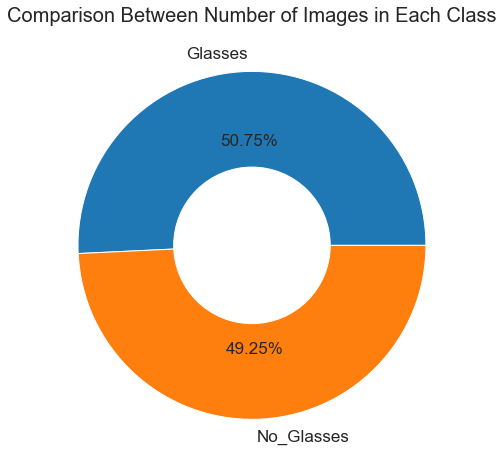

In [157]:
plt.figure(figsize=(8,8))
plt.pie(x=df_all_images_Aug['Class'].value_counts(),labels=list(df_all_images_Aug['Class'].value_counts().index)
        ,autopct='%.2f%%',textprops={'fontsize': 17})

plt.title('Comparison Between Number of Images in Each Class',fontdict={'fontsize':20})
centre_circle = plt.Circle((0,0),0.45,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle);

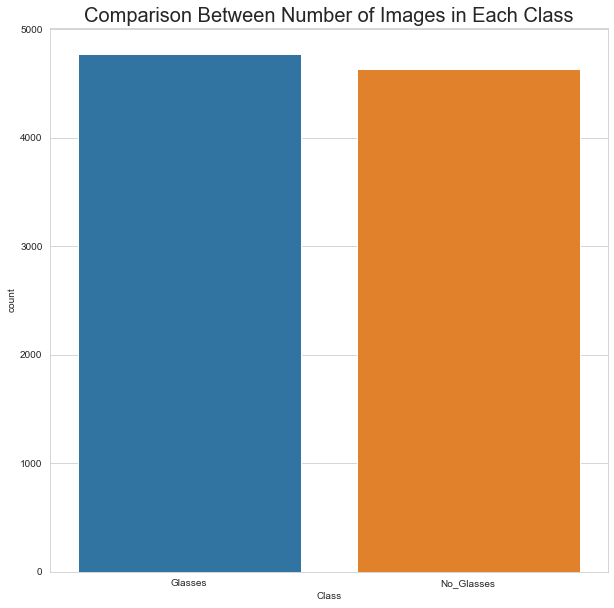

In [158]:
plt.figure(figsize=(10,10))
sns.countplot(x = "Class", data = df_all_images_Aug)
plt.title('Comparison Between Number of Images in Each Class',fontdict={'fontsize':20});

In [159]:
images_Aug = []
labels_Aug = []

directory = os.fsencode('Images')

for folder in os.listdir(directory):
    label = os.fsdecode(folder)
    for img in os.listdir(f'Images/{label}'):
        img_name = os.fsdecode(img)
        images_Aug.append(prepare_image(f'Images/{label}/{img_name}'))
        labels_Aug.append(label)

In [160]:
label_0_1_Aug = [int(labels_Aug[w].replace('no_glasses', "0").replace("glasses",'1')) for w in range(len(labels_Aug))]
label_0_1_Aug

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [161]:
len(label_0_1_Aug)

9399

In [162]:
X_digits_Aug, Y_digits_Aug = images_Aug, label_0_1_Aug

In [163]:
X_Aug = np.array(X_digits_Aug)

In [164]:
open_file = open("X_128x128_Aug.txt", "wb")
pickle.dump(X_Aug, open_file)
open_file.close()

In [165]:
Y_Aug = np.array(Y_digits_Aug)

In [166]:
open_file = open("Y_128x128_Aug.txt", "wb")
pickle.dump(Y_Aug, open_file)
open_file.close()

In [3]:
with open("X_128x128_Aug.txt", "rb") as fp: 
    X_Aug = pickle.load(fp)

In [4]:
with open("Y_128x128_Aug.txt", "rb") as fp: 
    Y_Aug = pickle.load(fp)

In [5]:
X_train_val, X_test, y_train_val, y_test = (train_test_split(X_Aug, Y_Aug, test_size = .1, random_state = 42))
X_train, X_val, y_train, y_val = (train_test_split(X_train_val, y_train_val, test_size = .111, random_state = 42))

In [6]:
y_train_cat = to_categorical(y_train)

In [7]:
X_train.shape

(7520, 128, 128, 3)

In [8]:
X_val.shape

(939, 128, 128, 3)

In [9]:
X_test.shape

(940, 128, 128, 3)

### Logistic Regression

In [10]:
X_trainn = X_train.reshape(7520,128*128*3)
X_vall = X_val.reshape(939,128*128*3)

In [11]:
LR = LogisticRegression()
LR.fit(X_trainn, y_train)
print('The accuracy for training : ',LR.score(X_trainn,y_train))
print('The accuracy for validation: ',LR.score(X_vall,y_val))

C:\Users\ali_m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy for training :  0.9700797872340425
The accuracy for validation:  0.8668796592119276


### NN

In [13]:
NN_scratch_2_1_Aug = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                         Flatten(),
                         Dense(500, activation='relu'),
                         Dense(2, activation='softmax')])

NN_scratch_2_1_Aug.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_scratch_2_1_model_Aug = NN_scratch_2_1_Aug.fit(X_train, y_train_cat, epochs=5, verbose=1, validation_split=0.1)

predict_x = NN_scratch_2_1_Aug.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_scratch_2_1_Aug.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

Epoch 1/5
212/212 [==============================] - 19s 90ms/step - loss: 650.5393 - accuracy: 0.6622 - val_loss: 423.4945 - val_accuracy: 0.5718
Epoch 2/5
212/212 [==============================] - 19s 90ms/step - loss: 125.9634 - accuracy: 0.7478 - val_loss: 58.3414 - val_accuracy: 0.8285
Epoch 3/5
212/212 [==============================] - 19s 91ms/step - loss: 91.0592 - accuracy: 0.7775 - val_loss: 128.5025 - val_accuracy: 0.7354
Epoch 4/5
212/212 [==============================] - 20s 94ms/step - loss: 69.5804 - accuracy: 0.7952 - val_loss: 83.0134 - val_accuracy: 0.7633
Epoch 5/5
212/212 [==============================] - 19s 91ms/step - loss: 73.5258 - accuracy: 0.7825 - val_loss: 31.9777 - val_accuracy: 0.8378
Training: 0.8757978723404255
Vali: 0.8519701810436635


need more epochs

### CNN

In [14]:
CNN_3_Aug = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                     Conv2D(filters=16, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=64, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(500, activation='relu'),
                     Dense(2, activation='softmax')])

CNN_3_Aug.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
CNN_3_model_Aug = CNN_3_Aug.fit(X_train, y_train_cat, epochs=5, verbose=1,  validation_split=0.1)

predict_x = CNN_3_Aug.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = CNN_3_Aug.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

Epoch 1/5
212/212 [==============================] - 72s 339ms/step - loss: 7.2147 - accuracy: 0.5188 - val_loss: 0.6850 - val_accuracy: 0.5465
Epoch 2/5
212/212 [==============================] - 84s 397ms/step - loss: 0.6901 - accuracy: 0.5393 - val_loss: 0.6907 - val_accuracy: 0.5519
Epoch 3/5
212/212 [==============================] - 80s 378ms/step - loss: 0.6862 - accuracy: 0.5597 - val_loss: 0.6738 - val_accuracy: 0.5731
Epoch 4/5
212/212 [==============================] - 79s 373ms/step - loss: 0.6880 - accuracy: 0.5405 - val_loss: 0.6934 - val_accuracy: 0.5186
Epoch 5/5
212/212 [==============================] - 80s 378ms/step - loss: 0.6921 - accuracy: 0.5284 - val_loss: 0.6899 - val_accuracy: 0.5519
Training: 0.5332446808510638
Vali: 0.5452609158679447


In [15]:
CNN_4_Aug = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                     Conv2D(filters=16, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=64, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=128, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(600, activation='relu'),
                        Dropout(0.05),
                     Dense(300, activation='relu'),
                        Dropout(0.05),
                     Dense(2, activation='softmax')])

CNN_4_Aug.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
CNN_4_model_Aug = CNN_4_Aug.fit(X_train, y_train_cat, epochs=5, verbose=1,  validation_split=0.1)

predict_x = CNN_4_Aug.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = CNN_4_Aug.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

Epoch 1/5
212/212 [==============================] - 82s 383ms/step - loss: 2.6590 - accuracy: 0.8548 - val_loss: 0.1530 - val_accuracy: 0.9468
Epoch 2/5
212/212 [==============================] - 83s 392ms/step - loss: 0.0991 - accuracy: 0.9700 - val_loss: 0.0805 - val_accuracy: 0.9827
Epoch 3/5
212/212 [==============================] - 83s 391ms/step - loss: 0.0449 - accuracy: 0.9880 - val_loss: 0.0458 - val_accuracy: 0.9894
Epoch 4/5
212/212 [==============================] - 89s 422ms/step - loss: 0.0327 - accuracy: 0.9907 - val_loss: 0.0534 - val_accuracy: 0.9840
Epoch 5/5
212/212 [==============================] - 88s 415ms/step - loss: 0.0803 - accuracy: 0.9771 - val_loss: 0.0523 - val_accuracy: 0.9867
Training: 0.9917553191489362
Vali: 0.9936102236421726


In [16]:
base = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))

# Freeze convolutional layers
for layer in base.layers:
    layer.trainable = False  

NN_transfer_1_2_Aug = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                         base,
                         Flatten(),
                         Dense(500, activation='relu'),
                         Dense(2, activation='softmax')])

NN_transfer_1_2_Aug.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_transfer_1_2_model_Aug = NN_transfer_1_2_Aug.fit(X_train, y_train_cat, epochs=5, verbose=1,validation_split=0.1, callbacks=[EarlyStopping()])

predict_x = NN_transfer_1_2_Aug.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_transfer_1_2_Aug.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

Epoch 1/5
212/212 [==============================] - 335s 2s/step - loss: 1.5561 - accuracy: 0.9354 - val_loss: 0.1221 - val_accuracy: 0.9574
Epoch 2/5
212/212 [==============================] - 378s 2s/step - loss: 0.0461 - accuracy: 0.9863 - val_loss: 0.1346 - val_accuracy: 0.9747
Training: 0.9913563829787234
Vali: 0.9776357827476039


In [17]:
base = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(128,128,3))

# Freeze convolutional layers
for layer in base.layers:
    layer.trainable = False  

NN_transfer_6_Aug = Sequential([InputLayer(input_shape=X_train.shape[1:]),
                         base,
                         Flatten(),
                         Dense(500, activation='relu'),
                         Dense(2, activation='softmax')])

NN_transfer_6_Aug.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_transfer_6_model_Aug = NN_transfer_6_Aug.fit(X_train, y_train_cat, epochs=5, verbose=1,validation_split=0.1 ,callbacks=[EarlyStopping()])

predict_x = NN_transfer_6_Aug.predict(X_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_transfer_6_Aug.predict(X_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

Epoch 1/5
212/212 [==============================] - 113s 511ms/step - loss: 0.2460 - accuracy: 0.9512 - val_loss: 0.0564 - val_accuracy: 0.9801
Epoch 2/5
212/212 [==============================] - 108s 511ms/step - loss: 0.0339 - accuracy: 0.9870 - val_loss: 0.0384 - val_accuracy: 0.9880
Training: 0.9961436170212766
Vali: 0.9882854100106496


# best model test

In [18]:
y_train_val_cat = to_categorical(y_train_val)

In [20]:
CNN_4_Final_model_Aug = CNN_4_Aug.fit(X_train_val, y_train_val_cat, epochs=5, verbose=1,  validation_split=0.1)

predict_x = CNN_4_Aug.predict(X_test)
classes_x = np.argmax(predict_x, axis=1)
predict_r = CNN_4_Aug.predict(X_train_val)
classes_r = np.argmax(predict_r, axis=1)
print("\n\n=============The Final Model Test=============\n")
print(f"Training and Validation: {accuracy_score(y_train_val, classes_r)}")
print(f"Test: {accuracy_score(y_test, classes_x)}")

Epoch 1/5
238/238 [==============================] - 91s 383ms/step - loss: 0.0202 - accuracy: 0.9937 - val_loss: 0.0261 - val_accuracy: 0.9941
Epoch 2/5
238/238 [==============================] - 94s 393ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0438 - val_accuracy: 0.9835
Epoch 3/5
238/238 [==============================] - 96s 405ms/step - loss: 0.0183 - accuracy: 0.9945 - val_loss: 0.0099 - val_accuracy: 0.9965
Epoch 4/5
238/238 [==============================] - 102s 427ms/step - loss: 0.0125 - accuracy: 0.9954 - val_loss: 0.0144 - val_accuracy: 0.9976
Epoch 5/5
238/238 [==============================] - 101s 423ms/step - loss: 0.0138 - accuracy: 0.9958 - val_loss: 0.0176 - val_accuracy: 0.9941


=============The Final Model Test=============

Training: 0.9985813925995981
validation: 0.9957446808510638


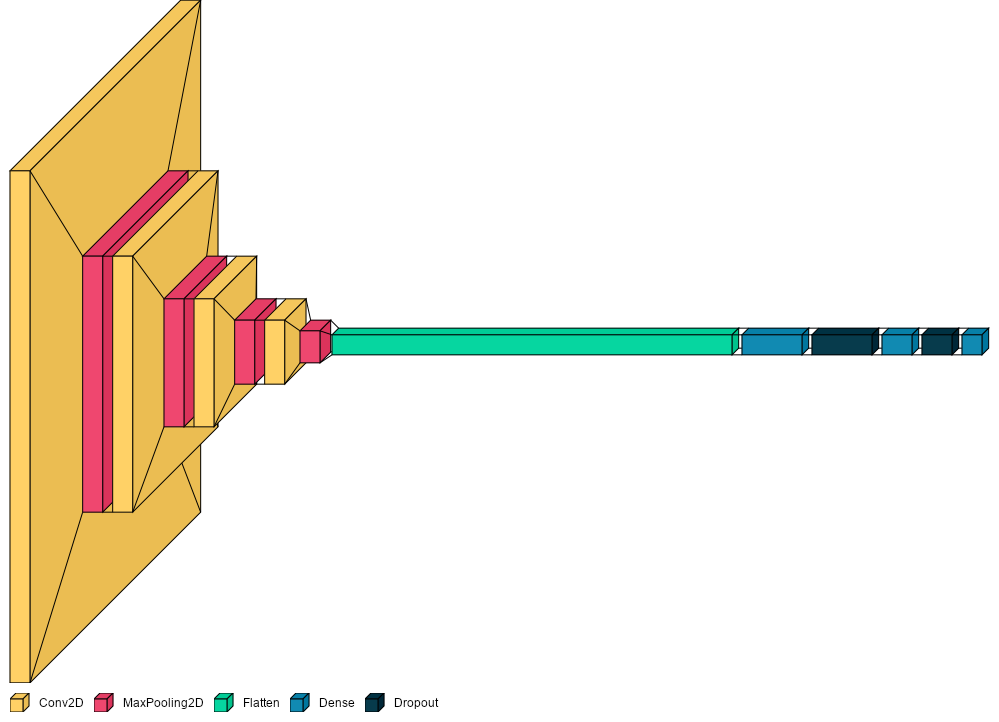

In [21]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(CNN_4_Aug, legend=True, font=font)

In [22]:
keras2ascii(CNN_4_Aug)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    128  128    3
              Conv2D    \|/  -------------------      1216     0.0%
                relu   #####    128  128   16
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     64   64   16
              Conv2D    \|/  -------------------     12832     0.2%
                relu   #####     64   64   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     32   32   32
              Conv2D    \|/  -------------------     51264     1.0%
                relu   #####     32   32   64
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     16   16   64
              Conv2D    \|/  -------------------    204928     3.8%
                relu   #####     16   16  128
        MaxPooling2D   Y max -------------------         0     0.0%
              

In [23]:
CNN_4_Aug.save("CNN_4_Aug_Final_Model")

INFO:tensorflow:Assets written to: CNN_4_Aug_Final_Model\assets


In [25]:
classes = ["No glasses","glasses"]

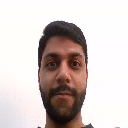

In [34]:
img_4 = image.load_img(f"Ali_noglasses_1.jpg",target_size=(128,128))
img_4

In [35]:
Z = image.img_to_array(img_4)
Z = np.expand_dims(Z,axis=0)
images = np.vstack([Z])
val = CNN_4_Aug.predict([images])
ind = max(val).argmax()
print(classes[ind])

No glasses


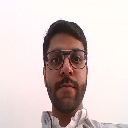

In [30]:
img_2 = image.load_img(f"Ali_2.jpg",target_size=(128,128))
img_2

In [31]:
Z = image.img_to_array(img_2)
Z = np.expand_dims(Z,axis=0)
images = np.vstack([Z])
val = CNN_4_Aug.predict([images])
ind = max(val).argmax()
print(classes[ind])

glasses
